In [1]:
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import __main__
import os
import kaleido
import plotly.express as px


In [2]:
search=[]

# get all csv files from cwd


In [3]:
for i in os.listdir():
    if i.endswith('csv'):
        search.append(i.split('.')[0])
        exec(f"__main__.{i.split('.')[0]}=pd.read_csv('{i}')")


# method to process text column from dataframe 

In [4]:
def clean(df):
    temp_df = df.copy().drop_duplicates(subset=['text'])
    temp_df['text'] = temp_df['text'].str.replace(
        "[\.?!&;,()[\]{\}\"\'_-]|\S*\d+\S*|\b\w{0,2}\b", '', regex=True)
    return temp_df


# remove duplicates, words less than length 2, words containing numerics & punctuations

## cleaned datasets will be saved to the variables in `__main__` with `_clean` appended to variable name. For eg: `goog -> goog_clean`


In [5]:
for i in search:
    exec(f"__main__.{i}_clean=clean({i})")


In [6]:
diff={'query':[],'rows':[]}
for q in search:
    diff['query'].append(q)
    rows_rem=eval(f'{q}.shape[0]-{q}_clean.shape[0]')
    diff['rows'].append(rows_rem)
diff_df=pd.DataFrame(diff)

# Number of duplicate rows removed from each query 

In [7]:
diff_df

,query,rows
0,altcoin,97467
1,appl,0
2,bitcoin,13053
3,coindesk,0
4,cryptocurrency,3667
5,gold,176
6,goog,0
7,yhoo,0


In [18]:
def graphCU(df, title):
    temp_df = df.groupby('created_at').size().reset_index(name='count')
    fig = make_subplots()
    g_count = go.Scatter(x=temp_df['created_at'], y=temp_df['count'],
                         name=f'tweet count per day', text=temp_df['count'], mode="markers+text+lines",
                         textposition='top center')
    fig.add_trace(g_count)

    temp_df = df.groupby(['created_at']).nunique()[
        'user'].reset_index(name='count')
    g_user = go.Scatter(x=temp_df['created_at'], y=temp_df['count'],
                        name=f'user count per day', text=temp_df['count'], mode="markers+text+lines", textposition='bottom center')
    fig.add_trace(g_user)
    fig.update_layout(title=f'Stats for keyword - {title}', height=550,width=1200)

    fig.show("svg")


# stats for each of the keyword - tweet count & user count for 1 week (Oct 1 2021 - Oct 7 2021) 

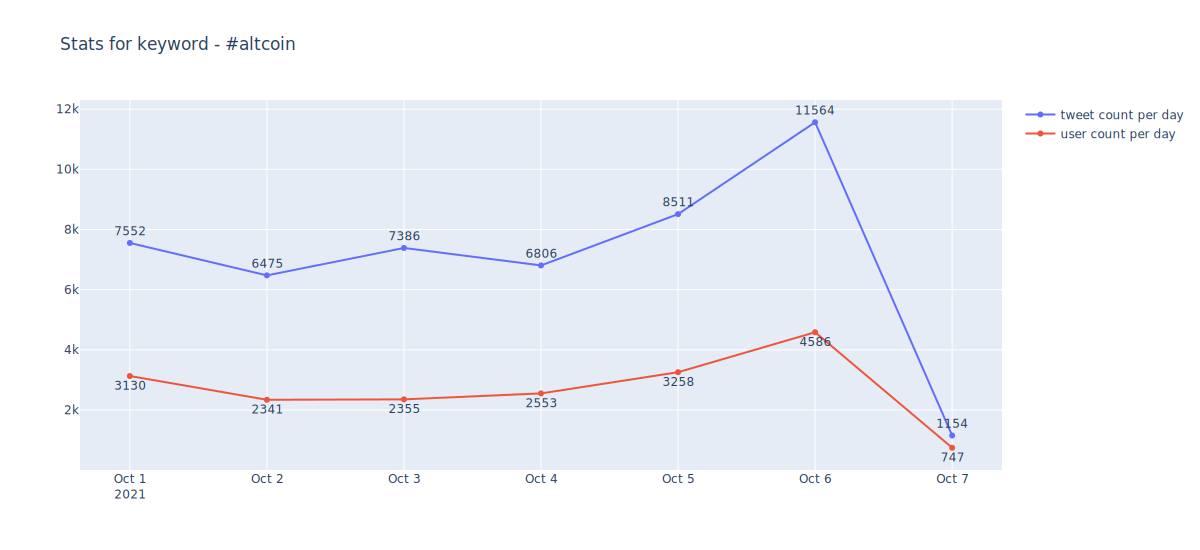

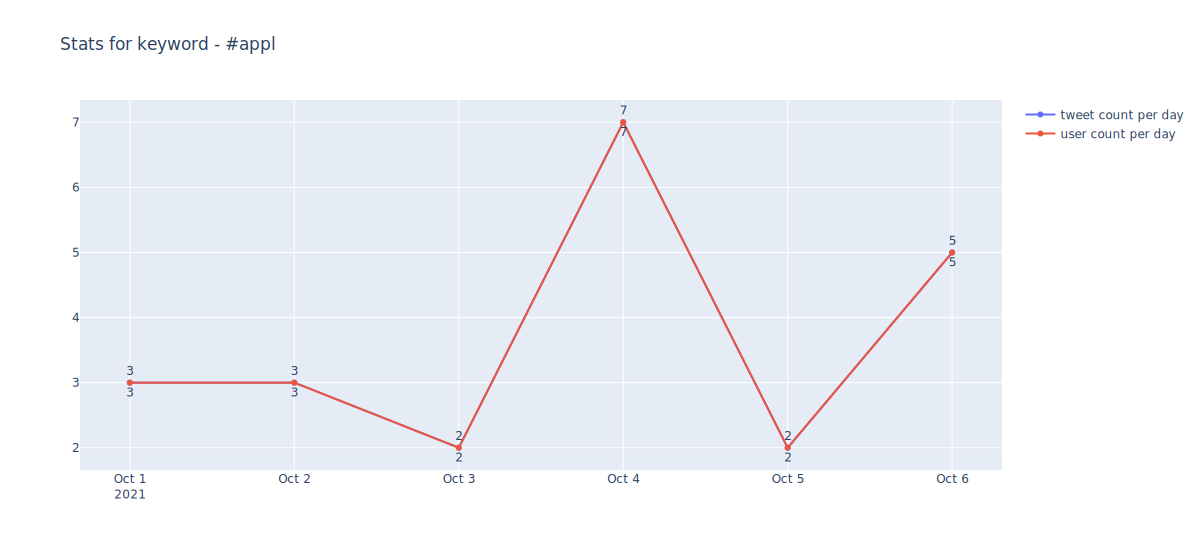

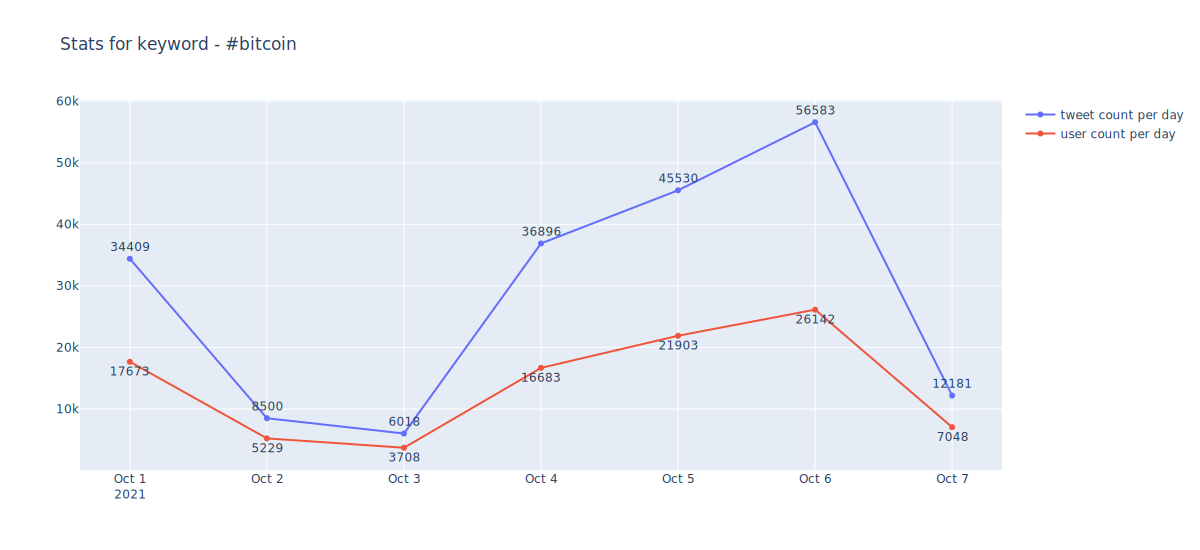

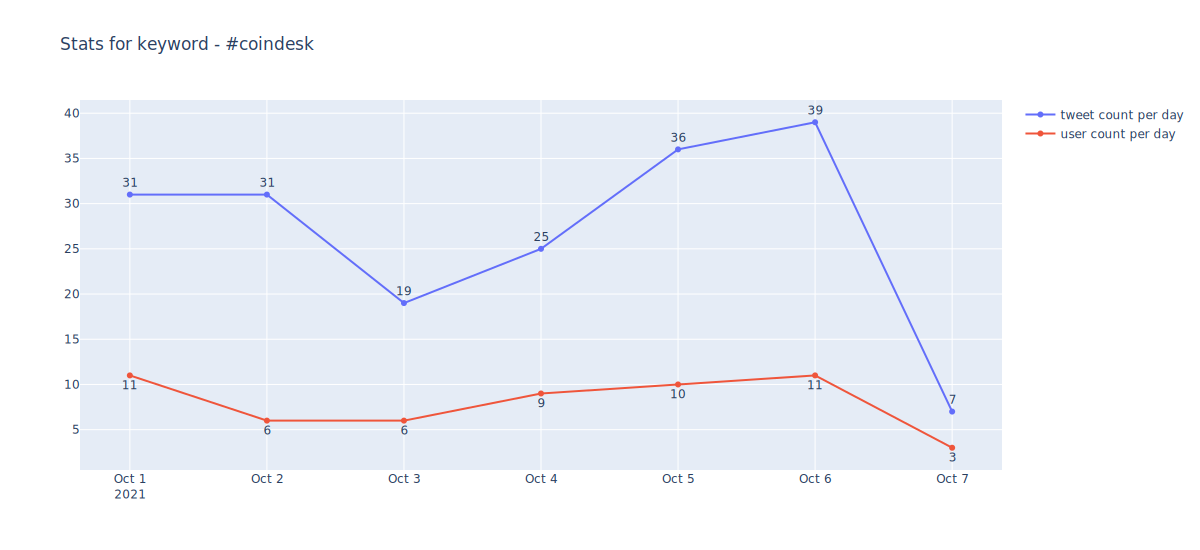

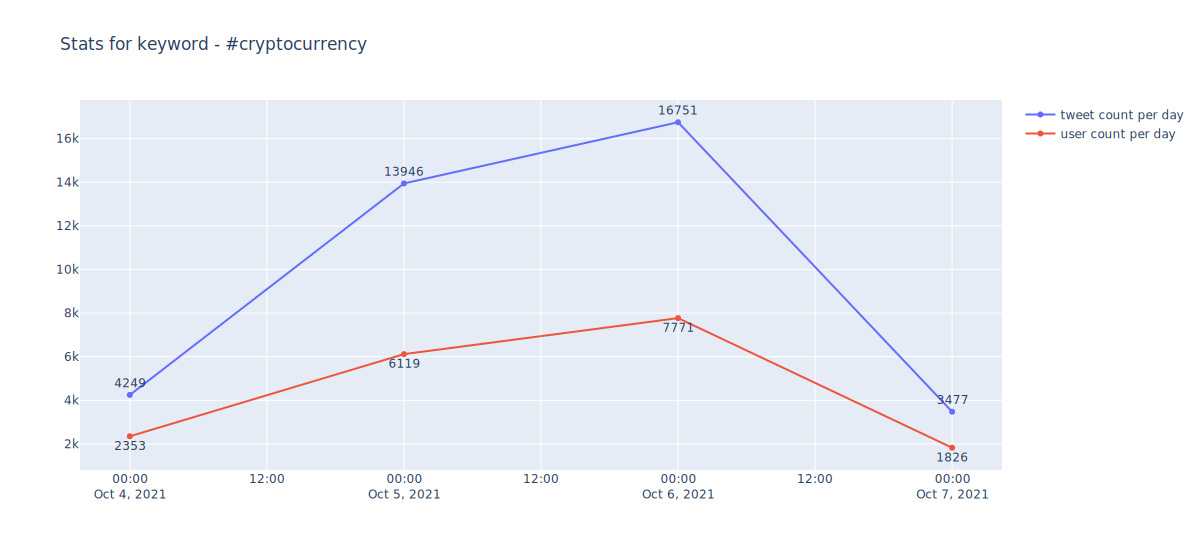

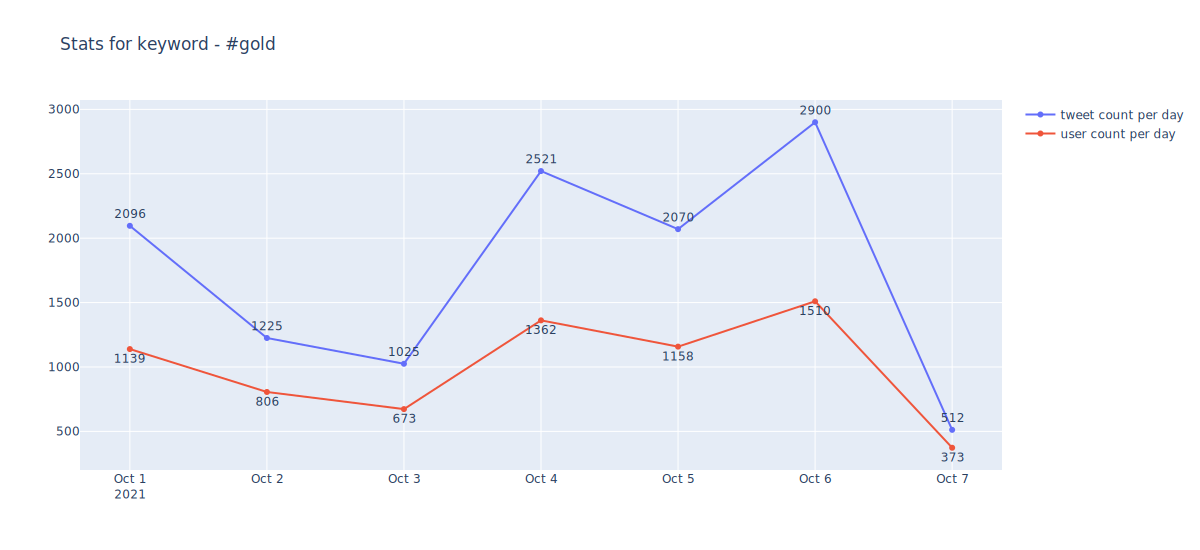

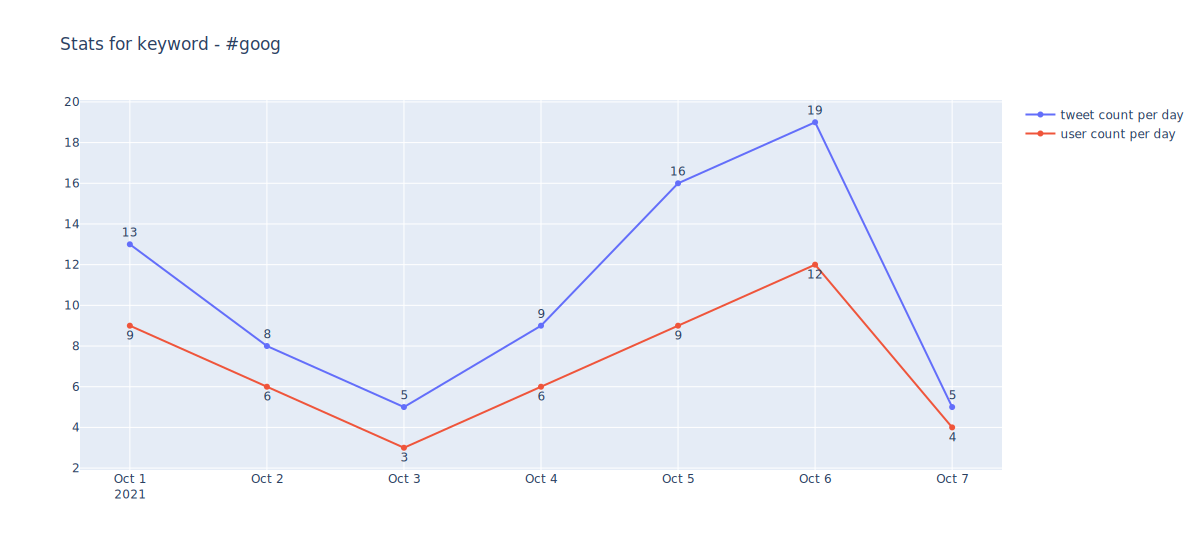

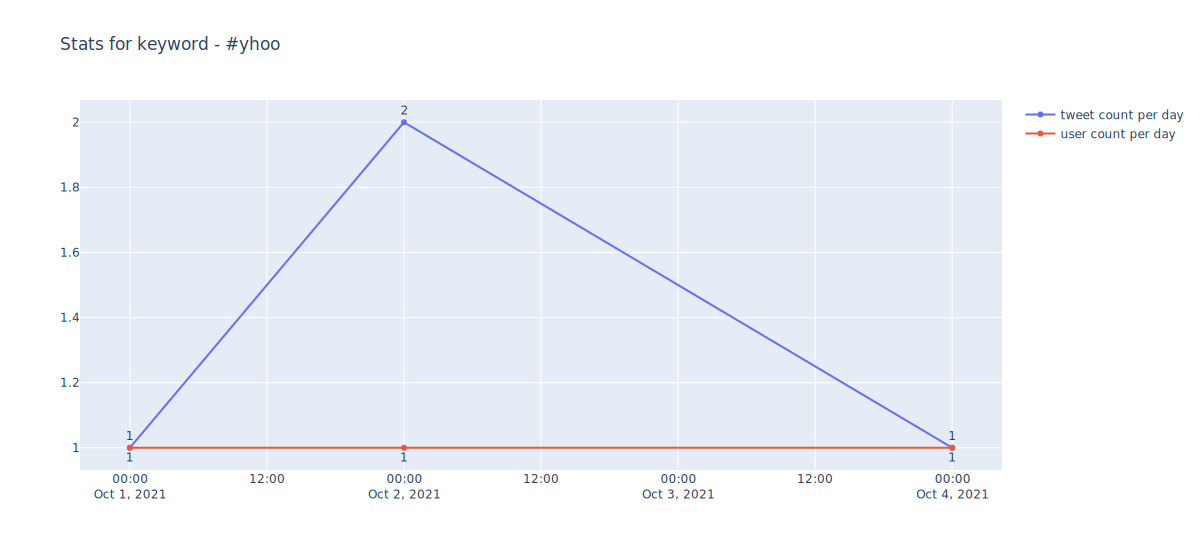

In [19]:
for q in search:
    graphCU(eval(f'{q}_clean'),f'#{q}') 